## Assignment 7, Question 2

In [26]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from statsmodels.datasets import get_rdataset
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler
from ISLP import load_data
from sklearn.cluster import (KMeans, AgglomerativeClustering)
from scipy.cluster.hierarchy import (linkage, dendrogram, cut_tree)
from ISLP.cluster import compute_linkage

USArrests=get_rdataset('USArrests').data
USArrests.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


(a)

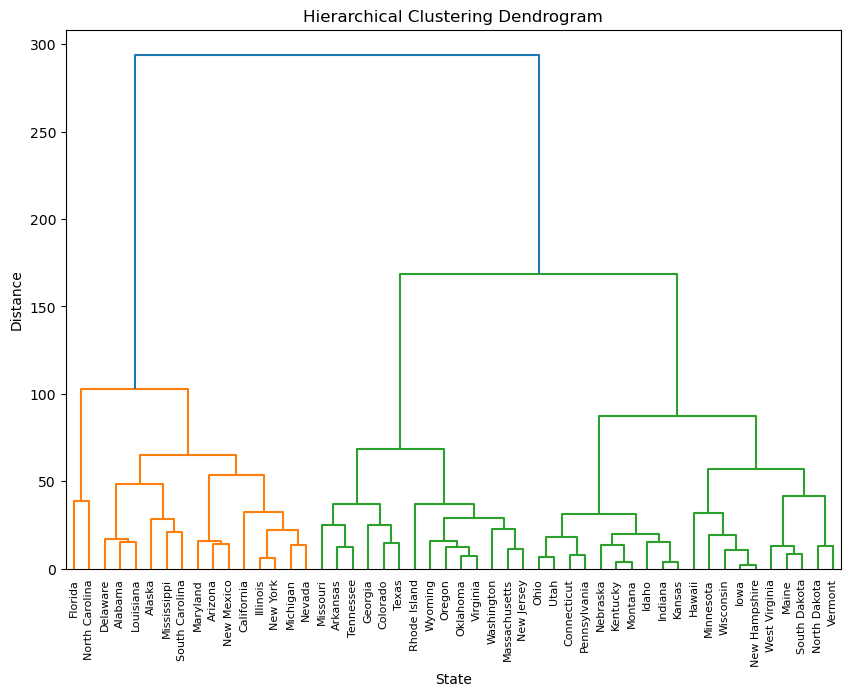

In [4]:
USArrests.index.name = 'State'

HClust = AgglomerativeClustering
hc_comp = HClust(distance_threshold=0, n_clusters=None, linkage='complete')
hc_comp.fit(USArrests)

linkage = compute_linkage(hc_comp)
plt.figure(figsize=(10, 7))
dendrogram(linkage, labels=USArrests.index.to_list(), leaf_rotation=90)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("State")
plt.ylabel("Distance")
plt.show()

(b)

In [6]:
clusters = cut_tree(linkage.astype(np.float64), n_clusters=3)
cluster_df = pd.DataFrame({'Cluster': clusters.flatten()}, index=USArrests.index)
cluster_df.index.name='State'
print(cluster_df.sort_values('Cluster'))

                Cluster
State                  
Alabama               0
Michigan              0
Maryland              0
New Mexico            0
Louisiana             0
New York              0
North Carolina        0
Illinois              0
Nevada                0
South Carolina        0
Mississippi           0
Florida               0
Delaware              0
California            0
Arizona               0
Alaska                0
Oregon                1
Oklahoma              1
Texas                 1
Virginia              1
Washington            1
New Jersey            1
Tennessee             1
Rhode Island          1
Missouri              1
Wyoming               1
Arkansas              1
Colorado              1
Massachusetts         1
Georgia               1
West Virginia         2
Vermont               2
Utah                  2
Connecticut           2
South Dakota          2
Hawaii                2
Idaho                 2
Montana               2
Indiana               2
Iowa            

(c)

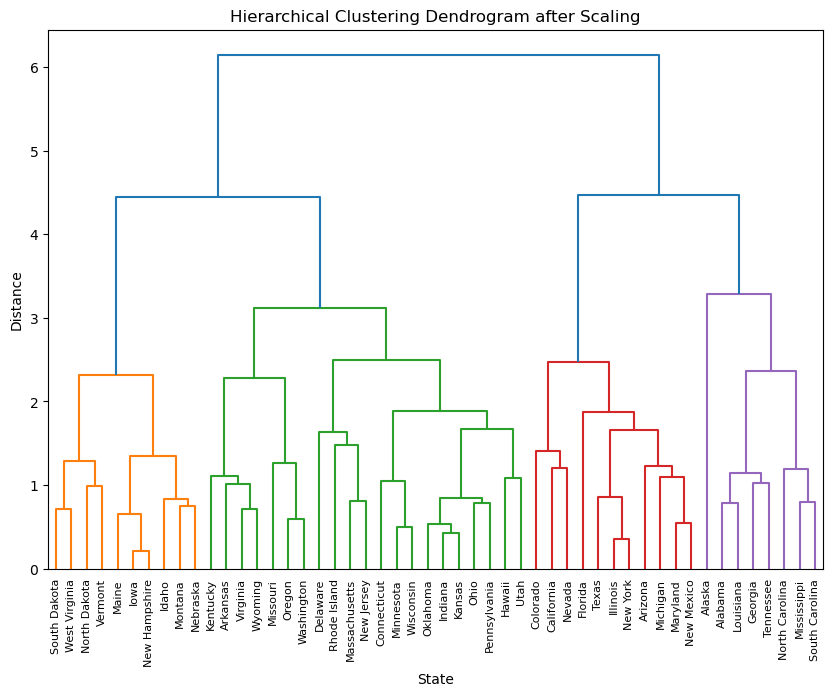

In [28]:
scaler=StandardScaler(with_std=True,with_mean=True)
UAscaled=scaler.fit_transform(USArrests)
hc_comp2 = HClust(distance_threshold=0, n_clusters=None, linkage='complete')
hc_comp2.fit(UAscaled)

linkage2 = compute_linkage(hc_comp2)
plt.figure(figsize=(10, 7))
dendrogram(linkage2, labels=USArrests.index.to_list(), leaf_rotation=90)
plt.title("Hierarchical Clustering Dendrogram after Scaling")
plt.xlabel("State")
plt.ylabel("Distance")
plt.show()